In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import pandas as pd
import numpy as np
import time

sns.set(style='white')


color_names = ["black",
               "windows blue",
               "red",
               "amber",
               "faded green",
               "dusty purple",
               "orange",
               "clay",
               "pink",
               "greyish",
               "mint",
               "light cyan",
               "steel blue",
               "forest green",
               "pastel purple",
               "salmon",
               "dark brown"]

colors = sns.xkcd_palette(color_names)

In [2]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('./learn_out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    disentangle_learndf_concat = pd.concat(dataframes)
    disentangle_learndf_concat.to_csv('disentangle_learn_agg_'+str(int(time.time()*1e6))+'.csv')


In [3]:
#  disentangle_learndf_concat = pd.read_csv('disentangle_learn_agg_1631024192861961.csv')

In [4]:
 disentangle_learndf_concat[(disentangle_learndf_concat['vae_name']=='ioss') \
                            & (disentangle_learndf_concat['dataset']=='dsprites')
                           ][['ioss_weight', 'randseed', 'dataset']].sort_values(['dataset','ioss_weight'])

,ioss_weight,randseed,dataset
0,0.0,14621556,dsprites
0,0.0,74423444,dsprites
0,0.0,89516554,dsprites
0,0.0,21913460,dsprites
0,0.0,21914340,dsprites
0,0.0,3835144,dsprites
0,0.0,99043646,dsprites
0,1.0,91341464,dsprites
0,1.0,67162556,dsprites
0,1.0,80588452,dsprites


In [5]:
# disentangle_learndf_concat = pd.read_csv('disentangle_learn_agg_1630880910020322.csv')

In [6]:
disentangle_learndf_concat.columns

Index(['Unnamed: 0', 'dataset', 'hidden_dim', 'lr', 'z_dim', 'batch_size',
       'vae_epochs', 'ioss_weight', 'beta_weight', 'gamma_weight',
       'spurious_corr', 'train_sample_size', 'randseed', 'input_dim',
       'vae_name', 'classical_vae_train_elbo', 'classical_vae_test_elbo',
       'ioss_vae_train_elbo', 'ioss_vae_test_elbo', 'beta_vae_train_elbo',
       'beta_vae_test_elbo', 'betatc_vae_train_elbo', 'betatc_vae_test_elbo',
       'factor_vae_train_elbo', 'factor_vae_test_elbo', 'irs_train',
       'irs_testobs', 'irs_testct', 'irs_oracle', 'ioss_train_0.1',
       'ioss_testobs_0.1', 'ioss_testct_0.1', 'ioss_oracle_0.1',
       'ioss_train_0.01', 'ioss_testobs_0.01', 'ioss_testct_0.01',
       'ioss_oracle_0.01', 'ioss_train_0.001', 'ioss_testobs_0.001',
       'ioss_testct_0.001', 'ioss_oracle_0.001', 'ioss_train_0.0001',
       'ioss_testobs_0.0001', 'ioss_testct_0.0001', 'ioss_oracle_0.0001',
       'gaussian_total_corr_train', 'gaussian_wasserstein_corr_train',
       '

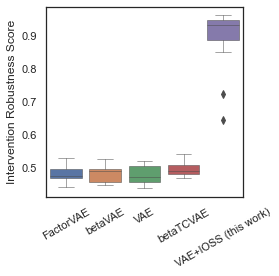

In [7]:
plt.figure(figsize=(4,4))
g=sns.boxplot(x="vae_name", y="irs_testobs", data=disentangle_learndf_concat[(disentangle_learndf_concat['dataset']=='dsprites') \
                          & (disentangle_learndf_concat['ioss_weight']>999)][\
                            ['irs_testobs', 'vae_name']].sort_values('vae_name'),  linewidth=0.5)
g.set(xlabel='')
g.set_xticklabels(['FactorVAE', 'betaVAE', 'VAE', 'betaTCVAE', 'VAE+IOSS (this work)'], rotation=30)
g.set(ylabel='Intervention Robustness Score')
plt.tight_layout()
plt.savefig('disentangle_learn_IRS.pdf')



In [8]:
disentangle_learndf_concat['ioss_weight'].unique()

array([1.e+03, 1.e+06, 0.e+00, 1.e+02, 1.e+01, 1.e+00, 1.e+04, 1.e+05])

In [9]:
# disentangle_learndf_concat[(disentangle_learndf_concat['vae_name']=='ioss')][\
#                             ['irs_testobs', 'ioss_weight', 'spurious_corr']]

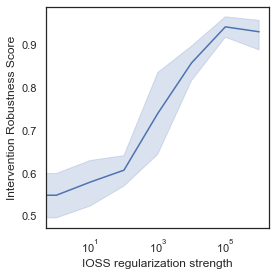

In [10]:
plt.figure(figsize=(4,4))
g=sns.lineplot(x="ioss_weight", y="irs_testobs", data=disentangle_learndf_concat[(disentangle_learndf_concat['vae_name']=='ioss') \
                                                                               & (disentangle_learndf_concat['spurious_corr']==0.9)][\
                            ['irs_testobs', 'ioss_weight']])
g.set(xlabel='IOSS regularization strength')
# g.set_xticklabels(['FactorVAE', 'betaVAE', 'VAE', 'betaTCVAE', 'VAE+IOSS'], rotation=30)
g.set(ylabel='Intervention Robustness Score')
g.set(xscale="log")
# g.ticklabel_format(style='sci')
plt.tight_layout()
plt.savefig('disentangle_learn_IRS_iossweight.pdf')




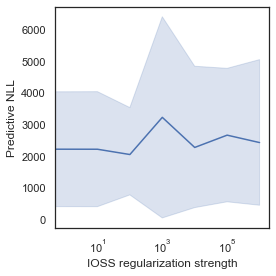

In [11]:
plt.figure(figsize=(4,4))
g=sns.lineplot(x="ioss_weight", y='ioss_vae_test_elbo', data=disentangle_learndf_concat[(disentangle_learndf_concat['vae_name']=='ioss') \
                                                                               & (disentangle_learndf_concat['spurious_corr']==0.9)][\
                            ['ioss_vae_test_elbo', 'ioss_weight']])
g.set(xlabel='IOSS regularization strength')
# g.set_xticklabels(['FactorVAE', 'betaVAE', 'VAE', 'betaTCVAE', 'VAE+IOSS'], rotation=30)
g.set(ylabel='Predictive NLL')
# g.ticklabel_format(style='sci')
g.set(xscale="log")
plt.tight_layout()
plt.savefig('disentangle_learn_elbo_ioss_tradeoff.pdf')





In [12]:
# plot support with different ioss; is it rectangular?